
Columnas en Test.csv: ['Reading_ID', 'absorbance0', 'absorbance1', 'absorbance2', 'absorbance3', 'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7', 'absorbance8', 'absorbance9', 'absorbance10', 'absorbance11', 'absorbance12', 'absorbance13', 'absorbance14', 'absorbance15', 'absorbance16', 'absorbance17', 'absorbance18', 'absorbance19', 'absorbance20', 'absorbance21', 'absorbance22', 'absorbance23', 'absorbance24', 'absorbance25', 'absorbance26', 'absorbance27', 'absorbance28', 'absorbance29', 'absorbance30', 'absorbance31', 'absorbance32', 'absorbance33', 'absorbance34', 'absorbance35', 'absorbance36', 'absorbance37', 'absorbance38', 'absorbance39', 'absorbance40', 'absorbance41', 'absorbance42', 'absorbance43', 'absorbance44', 'absorbance45', 'absorbance46', 'absorbance47', 'absorbance48', 'absorbance49', 'absorbance50', 'absorbance51', 'absorbance52', 'absorbance53', 'absorbance54', 'absorbance55', 'absorbance56', 'absorbance57', 'absorbance58', 'absorbance59', 'absorbance6

<ipython-input-3-35d21093802e>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(medianas.get(col, np.nan), inplace=True)


Epoch 1/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.5659 - val_loss: 0.0591
Epoch 2/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0954 - val_loss: 0.0438
Epoch 3/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0725 - val_loss: 0.0573
Epoch 4/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0652 - val_loss: 0.0343
Epoch 5/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0594 - val_loss: 0.0348
Epoch 6/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0526 - val_loss: 0.0371
Epoch 7/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0468 - val_loss: 0.0260
Epoch 8/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0464 - val_loss: 0.0250
Epoch 9/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0411 - val_loss: 0.0256
Epoch 10/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0405 - val_loss: 0.0294
Epoch 11/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0390 - val_loss: 0.0261
Epoch 12/200
165/165 ━━━━━━━━━

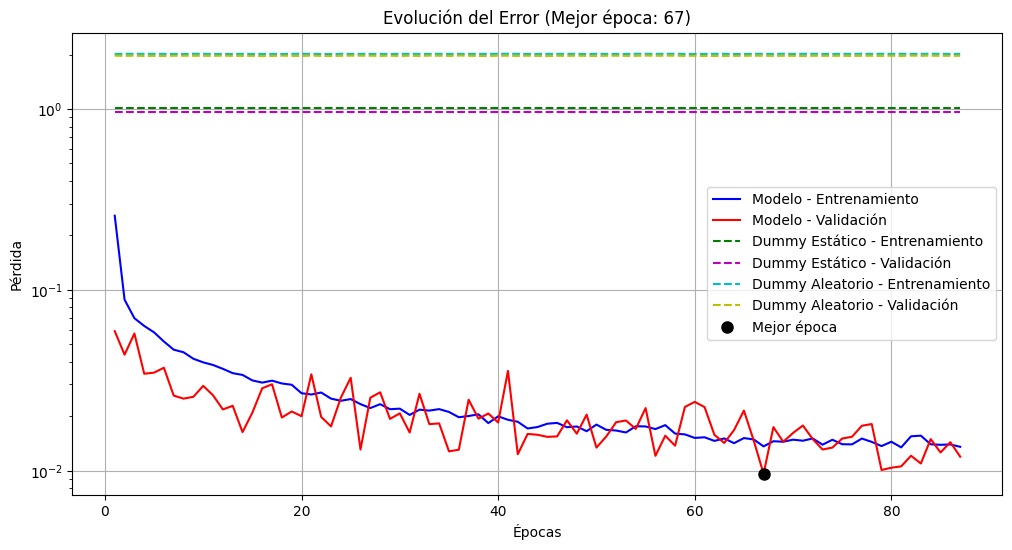

115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Resultados guardados en 'resultados_finales.csv'


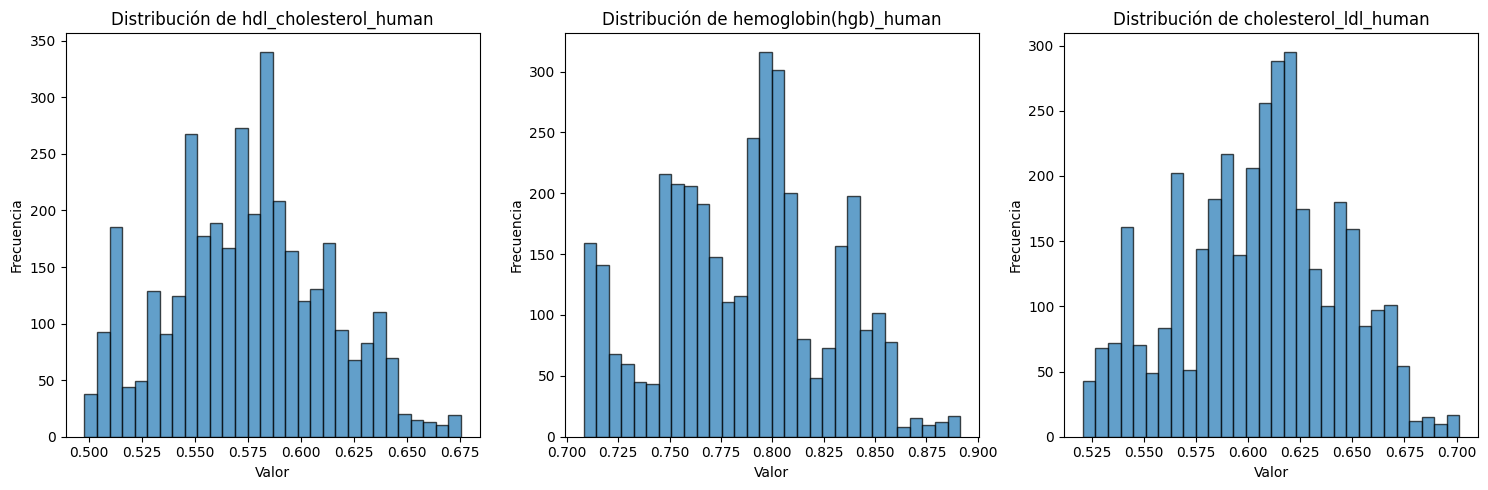

Saving Libro1.csv to Libro1 (1).csv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

Predicciones guardadas en 'predicciones_usuario.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import he_normal
from google.colab import files

# ======================================================================
# 1. Configuración Inicial
# ======================================================================
COLUMNAS_OBJETIVO = [
    'hdl_cholesterol_human',
    'hemoglobin(hgb)_human',
    'cholesterol_ldl_human'
]

ARCHIVO_TEST = 'Test.csv'
ARCHIVO_TRAIN = 'Train.csv'

# ======================================================================
# 2. Funciones de Preprocesamiento
# ======================================================================
def cargar_datos(ruta):
    df = pd.read_csv(ruta)
    print(f"\nColumnas en {ruta}: {df.columns.tolist()}")
    return df

def limpiar_y_convertir(df):
    for col in COLUMNAS_OBJETIVO:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

def imputar_valores(df, medianas):
    for col in COLUMNAS_OBJETIVO:
        if col in df.columns:
            df[col].fillna(medianas.get(col, np.nan), inplace=True)
    return df

# ======================================================================
# 3. Modelo Autoencoder Mejorado
# ======================================================================
def construir_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))

    # Encoder
    x = Dense(512, activation='relu', kernel_initializer=he_normal())(input_layer)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu', kernel_initializer=he_normal())(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu', kernel_initializer=he_normal())(x)

    # Decoder
    x = Dense(256, activation='relu', kernel_initializer=he_normal())(x)
    x = Dropout(0.2)(x)
    x = Dense(512, activation='relu', kernel_initializer=he_normal())(x)
    output_layer = Dense(input_dim, activation='linear')(x)

    autoencoder = Model(input_layer, output_layer)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder

# ======================================================================
# 4. Métodos de Comparación y Visualización
# ======================================================================
def calcular_metricas_dummy(X_train_real, X_val_real, num_epochs):
    # Método estático (media)
    train_mean = np.mean(X_train_real, axis=0)
    static_pred_train = np.tile(train_mean, (X_train_real.shape[0], 1))
    static_pred_val = np.tile(train_mean, (X_val_real.shape[0], 1))
    mse_static = {
        'train': [mean_squared_error(X_train_real, static_pred_train)] * num_epochs,
        'val': [mean_squared_error(X_val_real, static_pred_val)] * num_epochs
    }

    # Método aleatorio
    mse_random = {'train': [], 'val': []}
    for _ in range(num_epochs):
        random_pred_train = np.random.normal(loc=np.mean(X_train_real, axis=0),
                                            scale=np.std(X_train_real, axis=0),
                                            size=X_train_real.shape)
        random_pred_val = np.random.normal(loc=np.mean(X_train_real, axis=0),
                                          scale=np.std(X_train_real, axis=0),
                                          size=X_val_real.shape)

        mse_random['train'].append(mean_squared_error(X_train_real, random_pred_train))
        mse_random['val'].append(mean_squared_error(X_val_real, random_pred_val))

    return mse_static, mse_random

def visualizar_progreso(history, mse_static, mse_random):
    plt.figure(figsize=(12, 6))
    epochs = range(1, len(history.history['loss']) + 1)

    # Curvas del modelo
    plt.plot(epochs, history.history['loss'], 'b-', label='Modelo - Entrenamiento')
    plt.plot(epochs, history.history['val_loss'], 'r-', label='Modelo - Validación')

    # Líneas de referencia dummy
    plt.plot(epochs, mse_static['train'], 'g--', label='Dummy Estático - Entrenamiento')
    plt.plot(epochs, mse_static['val'], 'm--', label='Dummy Estático - Validación')
    plt.plot(epochs, mse_random['train'], 'c--', label='Dummy Aleatorio - Entrenamiento')
    plt.plot(epochs, mse_random['val'], 'y--', label='Dummy Aleatorio - Validación')

    # Mejor época
    best_epoch = np.argmin(history.history['val_loss']) + 1
    plt.plot([best_epoch], [history.history['val_loss'][best_epoch-1]],
             'ko', markersize=8, label='Mejor época')

    plt.title(f'Evolución del Error (Mejor época: {best_epoch})')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)
    plt.yscale('log')
    plt.show()

# ======================================================================
# 5. Categorización Dinámica
# ======================================================================
def categorizar_predicciones(predicciones):
    categorias = {}
    for i, col in enumerate(COLUMNAS_OBJETIVO):
        valores = predicciones[:, i]
        q33 = np.percentile(valores, 33)
        q66 = np.percentile(valores, 66)
        categorias[col] = {
            'low': (np.min(valores), q33),
            'medium': (q33, q66),
            'high': (q66, np.max(valores))
        }
    return categorias

# ======================================================================
# 6. Ejecución Principal
# ======================================================================
def main():
    # Cargar y preparar datos
    test_df = cargar_datos(ARCHIVO_TEST)
    train_df = cargar_datos(ARCHIVO_TRAIN)

    test_df = limpiar_y_convertir(test_df)
    train_df = limpiar_y_convertir(train_df)

    # Calcular medianas
    medianas = {}
    for col in COLUMNAS_OBJETIVO:
        if col in test_df.columns:
            medianas[col] = test_df[col].median()

    # Imputar valores
    test_df = imputar_valores(test_df, medianas)
    train_df = imputar_valores(train_df, medianas)

    # Preparar datos para el modelo
    columnas_comunes = list(set(test_df.columns) & set(train_df.columns) - {'Reading_ID'})
    X_train = train_df[columnas_comunes].select_dtypes(include=np.number)
    X_test = test_df[columnas_comunes].select_dtypes(include=np.number)

    # Escalado de datos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Construir y entrenar modelo
    autoencoder = construir_autoencoder(X_train_scaled.shape[1])

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True
    )

    history = autoencoder.fit(
        X_train_scaled, X_train_scaled,
        epochs=200,
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Calcular métricas dummy
    n_val = int(0.2 * len(X_train_scaled))
    X_train_real = X_train_scaled[:-n_val]
    X_val_real = X_train_scaled[-n_val:]

    mse_static, mse_random = calcular_metricas_dummy(
        X_train_real, X_val_real, len(history.history['loss'])
    )

    # Visualización comparativa
    visualizar_progreso(history, mse_static, mse_random)

    # Generar predicciones
    decoded_data = autoencoder.predict(X_test_scaled)
    predicted_values = scaler.inverse_transform(decoded_data)[:, :len(COLUMNAS_OBJETIVO)]

    # Categorizar resultados
    categorias = categorizar_predicciones(predicted_values)
    resultados = pd.DataFrame(predicted_values, columns=COLUMNAS_OBJETIVO)
    resultados['Reading_ID'] = test_df['Reading_ID']

    for col in COLUMNAS_OBJETIVO:
        if col in resultados.columns:
            resultados[f'{col}_category'] = resultados[col].apply(
                lambda x: next(
                    (cat for cat, (min_, max_) in categorias[col].items() if min_ <= x <= max_),
                    'out_of_range'
                )
            )

    # Guardar y mostrar resultados
    resultados.to_csv('resultados_finales.csv', index=False)
    print("\nResultados guardados en 'resultados_finales.csv'")

    # Visualización de distribuciones
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(COLUMNAS_OBJETIVO, 1):
        plt.subplot(1, 3, i)
        plt.hist(predicted_values[:, i-1], bins=30, edgecolor='k', alpha=0.7)
        plt.title(f'Distribución de {col}')
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

    # Predicción con archivo de usuario
    uploaded = files.upload()
    if uploaded:
        filename = list(uploaded.keys())[0]
        user_data = pd.read_csv(filename)
        user_data = limpiar_y_convertir(user_data)
        user_data = imputar_valores(user_data, medianas)

        user_data_common = user_data[columnas_comunes].select_dtypes(include=np.number)
        user_data_scaled = scaler.transform(user_data_common)

        decoded_user_data = autoencoder.predict(user_data_scaled)
        predicted_values_user = scaler.inverse_transform(decoded_user_data)[:, :3]

        predictions_user_df = pd.DataFrame(predicted_values_user, columns=COLUMNAS_OBJETIVO)
        predictions_user_df['Reading_ID'] = user_data['Reading_ID']

        for col in COLUMNAS_OBJETIVO:
            if col in predictions_user_df.columns:
                predictions_user_df[f'{col}_category'] = predictions_user_df[col].apply(
                    lambda x: next(
                        (cat for cat, (min_, max_) in categorias[col].items() if min_ <= x <= max_),
                        'out_of_range'
                    )
                )

        predictions_user_df.to_csv('predicciones_usuario.csv', index=False)
        print("\nPredicciones guardadas en 'predicciones_usuario.csv'")

if __name__ == "__main__":
    main()

Iniciando entrenamiento del modelo...

Columnas en Test.csv: ['Reading_ID', 'absorbance0', 'absorbance1', 'absorbance2', 'absorbance3', 'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7', 'absorbance8', 'absorbance9', 'absorbance10', 'absorbance11', 'absorbance12', 'absorbance13', 'absorbance14', 'absorbance15', 'absorbance16', 'absorbance17', 'absorbance18', 'absorbance19', 'absorbance20', 'absorbance21', 'absorbance22', 'absorbance23', 'absorbance24', 'absorbance25', 'absorbance26', 'absorbance27', 'absorbance28', 'absorbance29', 'absorbance30', 'absorbance31', 'absorbance32', 'absorbance33', 'absorbance34', 'absorbance35', 'absorbance36', 'absorbance37', 'absorbance38', 'absorbance39', 'absorbance40', 'absorbance41', 'absorbance42', 'absorbance43', 'absorbance44', 'absorbance45', 'absorbance46', 'absorbance47', 'absorbance48', 'absorbance49', 'absorbance50', 'absorbance51', 'absorbance52', 'absorbance53', 'absorbance54', 'absorbance55', 'absorbance56', 'absorbance57', 'absor

<ipython-input-4-81b907ff0faf>:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(medianas.get(col, np.nan), inplace=True)


Epoch 1/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.6419 - val_loss: 0.0725
Epoch 2/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1002 - val_loss: 0.0644
Epoch 3/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0777 - val_loss: 0.0570
Epoch 4/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0650 - val_loss: 0.0374
Epoch 5/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0575 - val_loss: 0.0437
Epoch 6/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0547 - val_loss: 0.0362
Epoch 7/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0525 - val_loss: 0.0300
Epoch 8/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0449 - val_loss: 0.0291
Epoch 9/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0444 - val_loss: 0.0213
Epoch 10/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0397 - val_loss: 0.0232
Epoch 11/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0390 - val_loss: 0.0234
Epoch 12/200
165/165 ━━━━━━━━━

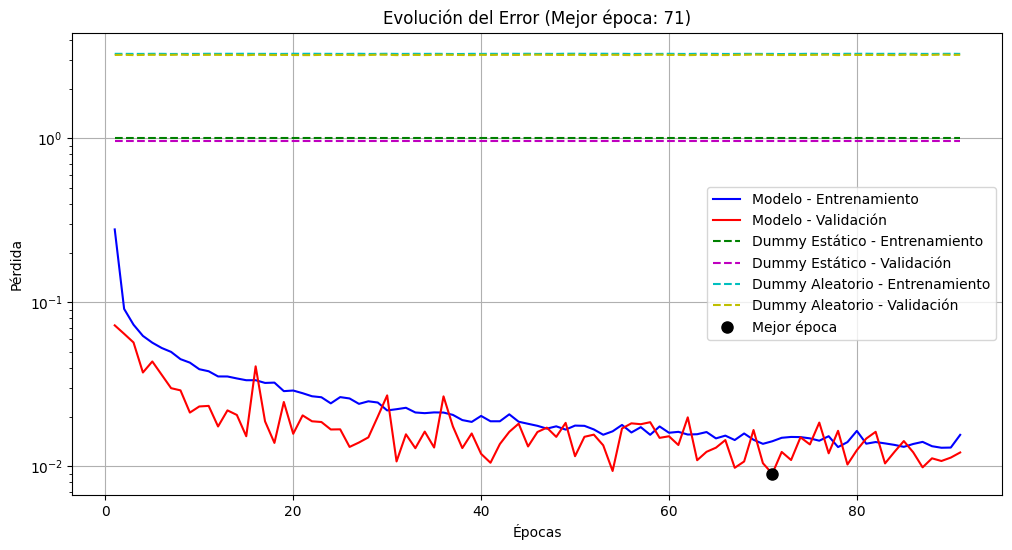


Modelo y scaler guardados para uso futuro

Por favor, sube tu archivo CSV para predicciones:


Saving Libro1.csv to Libro1.csv

Columnas en Test.csv: ['Reading_ID', 'absorbance0', 'absorbance1', 'absorbance2', 'absorbance3', 'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7', 'absorbance8', 'absorbance9', 'absorbance10', 'absorbance11', 'absorbance12', 'absorbance13', 'absorbance14', 'absorbance15', 'absorbance16', 'absorbance17', 'absorbance18', 'absorbance19', 'absorbance20', 'absorbance21', 'absorbance22', 'absorbance23', 'absorbance24', 'absorbance25', 'absorbance26', 'absorbance27', 'absorbance28', 'absorbance29', 'absorbance30', 'absorbance31', 'absorbance32', 'absorbance33', 'absorbance34', 'absorbance35', 'absorbance36', 'absorbance37', 'absorbance38', 'absorbance39', 'absorbance40', 'absorbance41', 'absorbance42', 'absorbance43', 'absorbance44', 'absorbance45', 'absorbance46', 'absorbance47', 'absorbance48', 'absorbance49', 'absorbance50', 'absorbance51', 'absorbance52', 'absorbance53', 'absorbance54', 'absorbance55', 'absorbance56', 'absorbance57', 'absorbance5

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: at least one array or dtype is required


Columnas en Test.csv: ['Reading_ID', 'absorbance0', 'absorbance1', 'absorbance2', 'absorbance3', 'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7', 'absorbance8', 'absorbance9', 'absorbance10', 'absorbance11', 'absorbance12', 'absorbance13', 'absorbance14', 'absorbance15', 'absorbance16', 'absorbance17', 'absorbance18', 'absorbance19', 'absorbance20', 'absorbance21', 'absorbance22', 'absorbance23', 'absorbance24', 'absorbance25', 'absorbance26', 'absorbance27', 'absorbance28', 'absorbance29', 'absorbance30', 'absorbance31', 'absorbance32', 'absorbance33', 'absorbance34', 'absorbance35', 'absorbance36', 'absorbance37', 'absorbance38', 'absorbance39', 'absorbance40', 'absorbance41', 'absorbance42', 'absorbance43', 'absorbance44', 'absorbance45', 'absorbance46', 'absorbance47', 'absorbance48', 'absorbance49', 'absorbance50', 'absorbance51', 'absorbance52', 'absorbance53', 'absorbance54', 'absorbance55', 'absorbance56', 'absorbance57', 'absorbance58', 'absorbance59', 'absorbance6

<ipython-input-28-35d21093802e>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(medianas.get(col, np.nan), inplace=True)


Epoch 1/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.6353 - val_loss: 0.0704
Epoch 2/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0917 - val_loss: 0.0474
Epoch 3/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0761 - val_loss: 0.0420
Epoch 4/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0635 - val_loss: 0.0430
Epoch 5/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0566 - val_loss: 0.0347
Epoch 6/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0529 - val_loss: 0.0289
Epoch 7/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0490 - val_loss: 0.0346
Epoch 8/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0534 - val_loss: 0.0253
Epoch 9/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0459 - val_loss: 0.0317
Epoch 10/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0402 - val_loss: 0.0260
Epoch 11/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0375 - val_loss: 0.0327
Epoch 12/200
165/165 ━━━━━━━━━

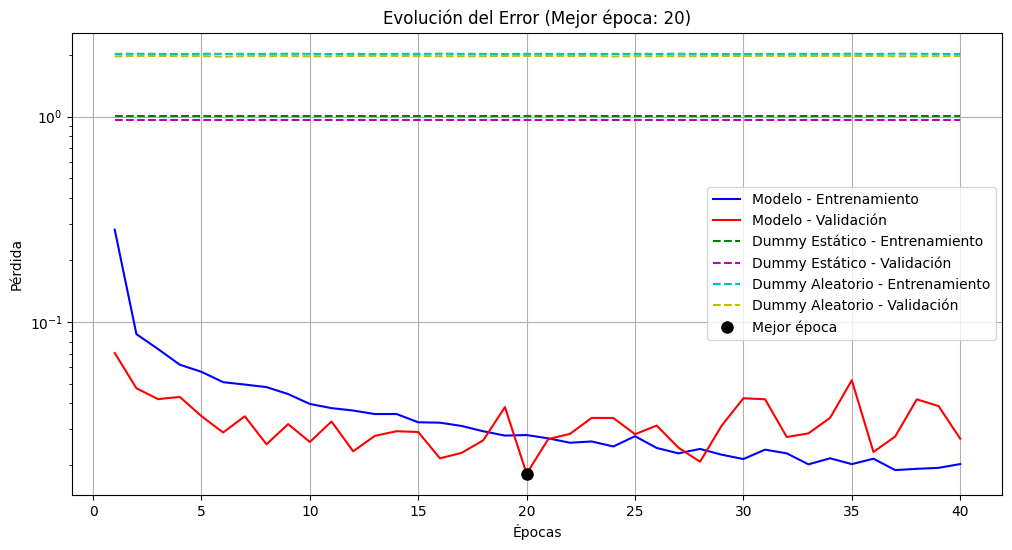

115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Resultados guardados en 'resultados_finales.csv'


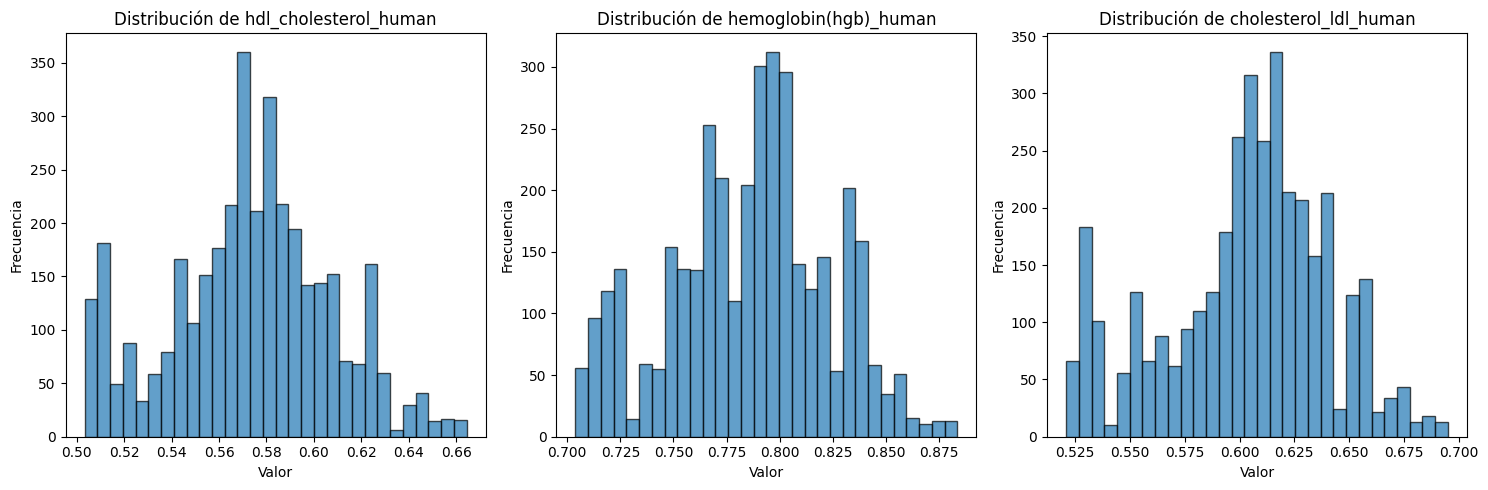

Saving Libro1.csv to Libro1.csv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Predicciones guardadas en 'predicciones_usuario.csv'



Columnas en Test.csv: ['Reading_ID', 'absorbance0', 'absorbance1', 'absorbance2', 'absorbance3', 'absorbance4', 'absorbance5', 'absorbance6', 'absorbance7', 'absorbance8', 'absorbance9', 'absorbance10', 'absorbance11', 'absorbance12', 'absorbance13', 'absorbance14', 'absorbance15', 'absorbance16', 'absorbance17', 'absorbance18', 'absorbance19', 'absorbance20', 'absorbance21', 'absorbance22', 'absorbance23', 'absorbance24', 'absorbance25', 'absorbance26', 'absorbance27', 'absorbance28', 'absorbance29', 'absorbance30', 'absorbance31', 'absorbance32', 'absorbance33', 'absorbance34', 'absorbance35', 'absorbance36', 'absorbance37', 'absorbance38', 'absorbance39', 'absorbance40', 'absorbance41', 'absorbance42', 'absorbance43', 'absorbance44', 'absorbance45', 'absorbance46', 'absorbance47', 'absorbance48', 'absorbance49', 'absorbance50', 'absorbance51', 'absorbance52', 'absorbance53', 'absorbance54', 'absorbance55', 'absorbance56', 'absorbance57', 'absorbance58', 'absorbance59', 'absorbance6

<ipython-input-31-8379be271e02>:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(medianas.get(col, np.nan), inplace=True)


Epoch 1/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.6019 - val_loss: 0.0600
Epoch 2/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0918 - val_loss: 0.0557
Epoch 3/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0736 - val_loss: 0.0415
Epoch 4/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0644 - val_loss: 0.0376
Epoch 5/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0583 - val_loss: 0.0320
Epoch 6/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0548 - val_loss: 0.0311
Epoch 7/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0506 - val_loss: 0.0325
Epoch 8/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0470 - val_loss: 0.0261
Epoch 9/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0449 - val_loss: 0.0238
Epoch 10/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0409 - val_loss: 0.0239
Epoch 11/200
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0387 - val_loss: 0.0218
Epoch 12/200
165/165 ━━━━━━━━━

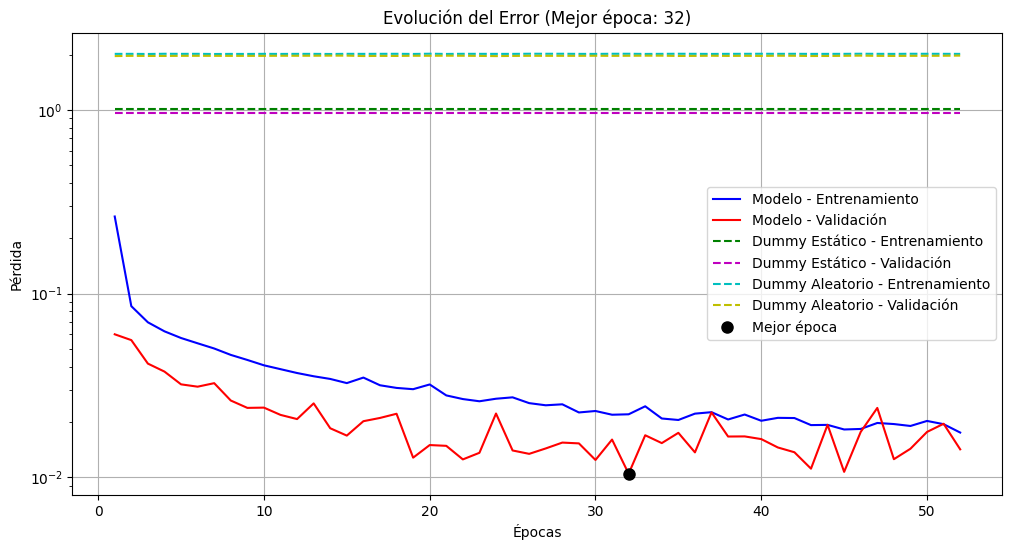

115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Resultados guardados en 'resultados_finales.csv'


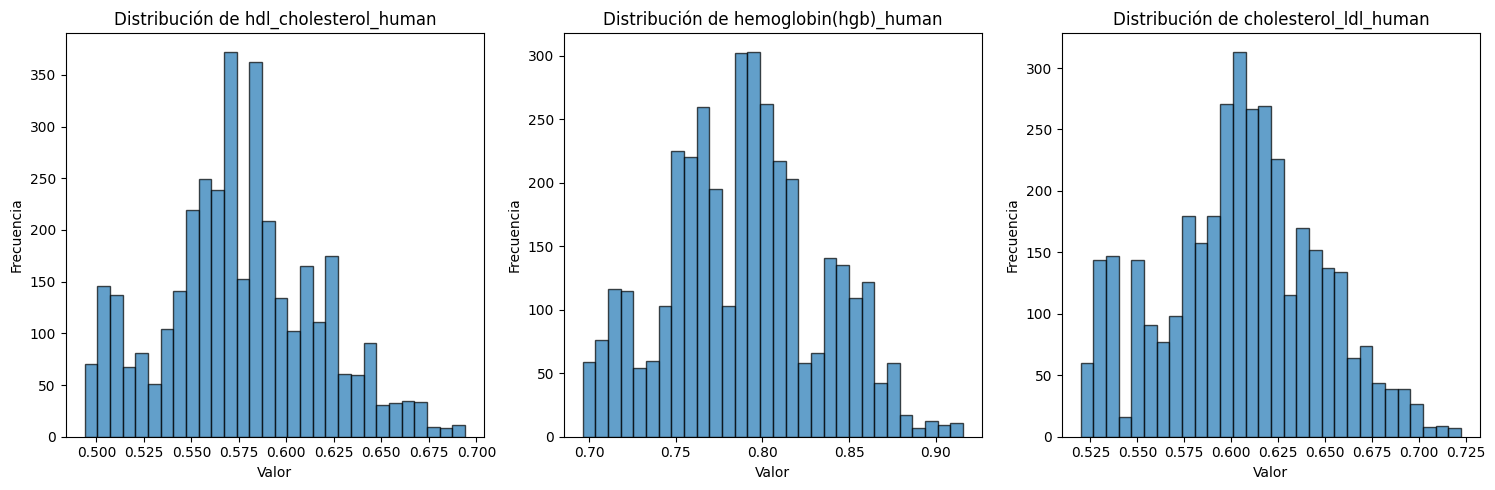

Saving Libro1.csv to Libro1 (1).csv
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

Predicciones del usuario:


,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,Reading_ID,hdl_cholesterol_human_category,hemoglobin(hgb)_human_category,cholesterol_ldl_human_category
0,0.53,0.75,0.55,ID_37BEI22R,low,low,low


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import he_normal
from google.colab import files
from IPython.display import display

# ======================================================================
# 1. Configuración Inicial
# ======================================================================
COLUMNAS_OBJETIVO = [
    'hdl_cholesterol_human',
    'hemoglobin(hgb)_human',
    'cholesterol_ldl_human'
]

ARCHIVO_TEST = 'Test.csv'
ARCHIVO_TRAIN = 'Train.csv'

# ======================================================================
# 2. Funciones de Preprocesamiento
# ======================================================================
def cargar_datos(ruta):
    df = pd.read_csv(ruta)
    print(f"\nColumnas en {ruta}: {df.columns.tolist()}")
    return df

def limpiar_y_convertir(df):
    for col in COLUMNAS_OBJETIVO:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

def imputar_valores(df, medianas):
    for col in COLUMNAS_OBJETIVO:
        if col in df.columns:
            df[col].fillna(medianas.get(col, np.nan), inplace=True)
    return df

# ======================================================================
# 3. Modelo Autoencoder Mejorado
# ======================================================================
def construir_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))

    # Encoder
    x = Dense(512, activation='relu', kernel_initializer=he_normal())(input_layer)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu', kernel_initializer=he_normal())(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu', kernel_initializer=he_normal())(x)

    # Decoder
    x = Dense(256, activation='relu', kernel_initializer=he_normal())(x)
    x = Dropout(0.2)(x)
    x = Dense(512, activation='relu', kernel_initializer=he_normal())(x)
    output_layer = Dense(input_dim, activation='linear')(x)

    autoencoder = Model(input_layer, output_layer)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder

# ======================================================================
# 4. Métodos de Comparación y Visualización
# ======================================================================
def calcular_metricas_dummy(X_train_real, X_val_real, num_epochs):
    # Método estático (media)
    train_mean = np.mean(X_train_real, axis=0)
    static_pred_train = np.tile(train_mean, (X_train_real.shape[0], 1))
    static_pred_val = np.tile(train_mean, (X_val_real.shape[0], 1))
    mse_static = {
        'train': [mean_squared_error(X_train_real, static_pred_train)] * num_epochs,
        'val': [mean_squared_error(X_val_real, static_pred_val)] * num_epochs
    }

    # Método aleatorio
    mse_random = {'train': [], 'val': []}
    for _ in range(num_epochs):
        random_pred_train = np.random.normal(loc=np.mean(X_train_real, axis=0),
                                            scale=np.std(X_train_real, axis=0),
                                            size=X_train_real.shape)
        random_pred_val = np.random.normal(loc=np.mean(X_train_real, axis=0),
                                          scale=np.std(X_train_real, axis=0),
                                          size=X_val_real.shape)

        mse_random['train'].append(mean_squared_error(X_train_real, random_pred_train))
        mse_random['val'].append(mean_squared_error(X_val_real, random_pred_val))

    return mse_static, mse_random

def visualizar_progreso(history, mse_static, mse_random):
    plt.figure(figsize=(12, 6))
    epochs = range(1, len(history.history['loss']) + 1)

    # Curvas del modelo
    plt.plot(epochs, history.history['loss'], 'b-', label='Modelo - Entrenamiento')
    plt.plot(epochs, history.history['val_loss'], 'r-', label='Modelo - Validación')

    # Líneas de referencia dummy
    plt.plot(epochs, mse_static['train'], 'g--', label='Dummy Estático - Entrenamiento')
    plt.plot(epochs, mse_static['val'], 'm--', label='Dummy Estático - Validación')
    plt.plot(epochs, mse_random['train'], 'c--', label='Dummy Aleatorio - Entrenamiento')
    plt.plot(epochs, mse_random['val'], 'y--', label='Dummy Aleatorio - Validación')

    # Mejor época
    best_epoch = np.argmin(history.history['val_loss']) + 1
    plt.plot([best_epoch], [history.history['val_loss'][best_epoch-1]],
             'ko', markersize=8, label='Mejor época')

    plt.title(f'Evolución del Error (Mejor época: {best_epoch})')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)
    plt.yscale('log')
    plt.show()

# ======================================================================
# 5. Categorización Dinámica
# ======================================================================
def categorizar_predicciones(predicciones):
    categorias = {}
    for i, col in enumerate(COLUMNAS_OBJETIVO):
        valores = predicciones[:, i]
        q33 = np.percentile(valores, 33)
        q66 = np.percentile(valores, 66)
        categorias[col] = {
            'low': (np.min(valores), q33),
            'medium': (q33, q66),
            'high': (q66, np.max(valores))
        }
    return categorias

# ======================================================================
# 6. Ejecución Principal
# ======================================================================
def main():
    # Cargar y preparar datos
    test_df = cargar_datos(ARCHIVO_TEST)
    train_df = cargar_datos(ARCHIVO_TRAIN)

    test_df = limpiar_y_convertir(test_df)
    train_df = limpiar_y_convertir(train_df)

    # Calcular medianas
    medianas = {}
    for col in COLUMNAS_OBJETIVO:
        if col in test_df.columns:
            medianas[col] = test_df[col].median()

    # Imputar valores
    test_df = imputar_valores(test_df, medianas)
    train_df = imputar_valores(train_df, medianas)

    # Preparar datos para el modelo
    columnas_comunes = list(set(test_df.columns) & set(train_df.columns) - {'Reading_ID'})
    X_train = train_df[columnas_comunes].select_dtypes(include=np.number)
    X_test = test_df[columnas_comunes].select_dtypes(include=np.number)

    # Escalado de datos
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Construir y entrenar modelo
    autoencoder = construir_autoencoder(X_train_scaled.shape[1])

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True
    )

    history = autoencoder.fit(
        X_train_scaled, X_train_scaled,
        epochs=200,
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Calcular métricas dummy
    n_val = int(0.2 * len(X_train_scaled))
    X_train_real = X_train_scaled[:-n_val]
    X_val_real = X_train_scaled[-n_val:]

    mse_static, mse_random = calcular_metricas_dummy(
        X_train_real, X_val_real, len(history.history['loss'])
    )

    # Visualización comparativa
    visualizar_progreso(history, mse_static, mse_random)

    # Generar predicciones
    decoded_data = autoencoder.predict(X_test_scaled)
    predicted_values = scaler.inverse_transform(decoded_data)[:, :len(COLUMNAS_OBJETIVO)]

    # Categorizar resultados
    categorias = categorizar_predicciones(predicted_values)
    resultados = pd.DataFrame(predicted_values, columns=COLUMNAS_OBJETIVO)
    resultados['Reading_ID'] = test_df['Reading_ID']

    for col in COLUMNAS_OBJETIVO:
        if col in resultados.columns:
            resultados[f'{col}_category'] = resultados[col].apply(
                lambda x: next(
                    (cat for cat, (min_, max_) in categorias[col].items() if min_ <= x <= max_),
                    'out_of_range'
                )
            )

    # Guardar y mostrar resultados
    resultados.to_csv('resultados_finales.csv', index=False)
    print("\nResultados guardados en 'resultados_finales.csv'")

    # Visualización de distribuciones
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(COLUMNAS_OBJETIVO, 1):
        plt.subplot(1, 3, i)
        plt.hist(predicted_values[:, i-1], bins=30, edgecolor='k', alpha=0.7)
        plt.title(f'Distribución de {col}')
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

    # Predicción con archivo de usuario
    uploaded = files.upload()
    if uploaded:
        filename = list(uploaded.keys())[0]
        user_data = pd.read_csv(filename)
        user_data = limpiar_y_convertir(user_data)
        user_data = imputar_valores(user_data, medianas)

        user_data_common = user_data[columnas_comunes].select_dtypes(include=np.number)
        user_data_scaled = scaler.transform(user_data_common)

        decoded_user_data = autoencoder.predict(user_data_scaled)
        predicted_values_user = scaler.inverse_transform(decoded_user_data)[:, :3]

        predictions_user_df = pd.DataFrame(predicted_values_user, columns=COLUMNAS_OBJETIVO)
        predictions_user_df['Reading_ID'] = user_data['Reading_ID']

        for col in COLUMNAS_OBJETIVO:
            if col in predictions_user_df.columns:
                predictions_user_df[f'{col}_category'] = predictions_user_df[col].apply(
                    lambda x: next(
                        (cat for cat, (min_, max_) in categorias[col].items() if min_ <= x <= max_),
                        'out_of_range'
                    )
                )

# Mostrar resultados con estilo profesional
        print("\nPredicciones del usuario:")
        display(
            predictions_user_df.style
            .set_properties(**{
                'background-color': '#f8f9fa',
                'border': '1px solid #dee2e6',
                'padding': '5px'
            })
            .format(precision=2, subset=pd.IndexSlice[:, COLUMNAS_OBJETIVO])
            .set_table_styles([
                {
                    'selector': 'th',
                    'props': [
                        ('background-color', '#343a40'),
                        ('color', 'white'),
                        ('font-weight', 'bold')
                    ]
                },
                {
                    'selector': 'th.row_heading, td.row_heading',
                    'props': [('display', 'none')]
                }
            ])
        )

if __name__ == "__main__":
    main()